<a href="https://colab.research.google.com/github/rajathrrao/Pattern-Recognition/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import required Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
def PCA_from_scratch(X , num_PC):
  #Step-1 - Obtaining Covariance Matrix
  X_meaned = X-np.mean(X, axis=0)
  cov_mat = np.cov(X_meaned, rowvar=False)
  
  #Step-2 - Calculating Eigen Values and Eigen Vectors
  eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]
  
  #Step-3 - Selecting required number of Eigen Vectors and Computing new Features
  eigenvector_subset = sorted_eigenvectors[:,0:num_PC]
  X_extracted = np.dot(eigenvector_subset.T, X_meaned.T ).T
  
  return X_extracted

In [3]:
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = ['target']
data = pd.read_csv(url, names=features+target)
x = data.loc[:, features].values
y = data.loc[:, target].values
data.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,PC1,PC2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa


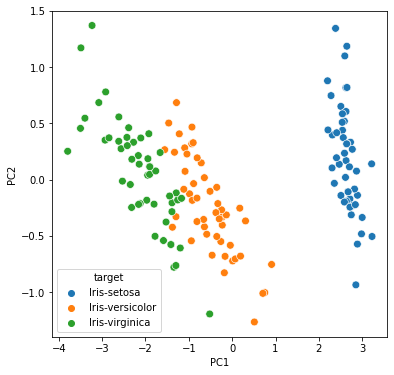

In [4]:
#Applying it to PCA function defined above
X_extracted = PCA_from_scratch(x, 2)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X_extracted, columns=['PC1','PC2'])
principal_df = pd.concat([principal_df , data[target]], axis = 1)

#Scatter plot of PC1, PC2 and target
plt.figure(figsize=(6,6))
sb.scatterplot(data=principal_df, x='PC1', y='PC2', hue='target', s=60)
principal_df.head()

,PC1,PC2,target
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


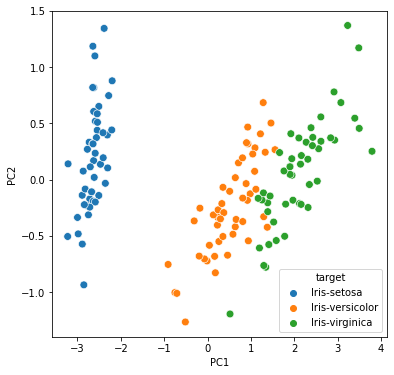

In [5]:
#Applying it to PCA function imported from sklearn 
pca = PCA(n_components=2)
X_extracted = pca.fit_transform(x)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X_extracted, columns=['PC1','PC2'])
principal_df = pd.concat([principal_df, data[target]], axis = 1)

#Scatter plot of PC1, PC2 and target
plt.figure(figsize=(6,6))
sb.scatterplot(data=principal_df, x='PC1', y='PC2', hue='target', s=60)
principal_df.head()

In [6]:
#Get the breast cancer dataset
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
breast_data = breast.data
breast_labels = np.reshape(breast.target,(569,1))
final_breast_data = np.concatenate([breast_data,breast_labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
target = ['label']
breast_dataset.columns = np.append(features,'label')
x = breast_dataset.loc[:, features].values
y = breast_dataset.loc[:, target].values
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


,PC1,PC2,label
0,1160.142574,-293.917544,0.0
1,1269.122443,15.630182,0.0
2,995.793889,39.156743,0.0
3,-407.180803,-67.380320,0.0
4,930.341180,189.340742,0.0


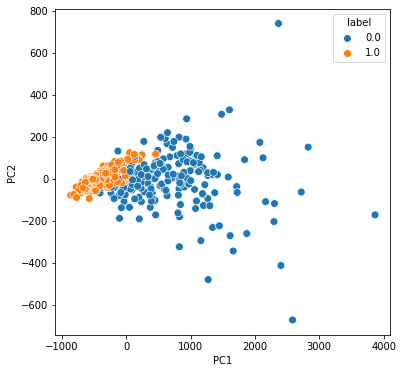

In [7]:
#Applying it to PCA function defined above
X_extracted = PCA_from_scratch(x, 2)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X_extracted, columns=['PC1','PC2'])
principal_df = pd.concat([principal_df , breast_dataset[target]], axis = 1)

#Scatter plot of PC1, PC2 and label
plt.figure(figsize=(6,6))
sb.scatterplot(data=principal_df, x='PC1', y='PC2', hue='label', s=60)
principal_df.head()

,PC1,PC2,label
0,1160.142574,-293.917544,0.0
1,1269.122443,15.630182,0.0
2,995.793889,39.156743,0.0
3,-407.180803,-67.380320,0.0
4,930.341180,189.340742,0.0


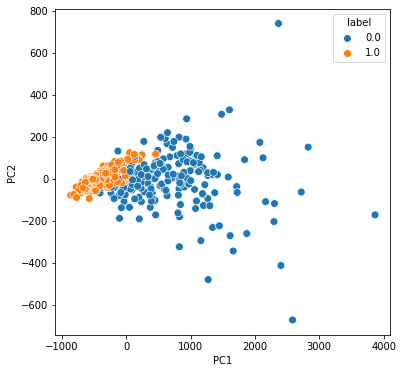

In [8]:
#Applying it to PCA function imported from sklearn 
pca = PCA(n_components=2)
X_extracted = pca.fit_transform(x)

#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(X_extracted, columns=['PC1','PC2'])
principal_df = pd.concat([principal_df, breast_dataset[target]], axis = 1)

#Scatter plot of PC1, PC2 and label
plt.figure(figsize=(6,6))
sb.scatterplot(data=principal_df, x='PC1', y='PC2', hue='label', s=60)
principal_df.head()